In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('gaming_behavior.csv')
print("Data Preview:\n", df.head())
print("Data Info:\n", df.info())

Data Preview:
    PlayerID  Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
0      9000   43    Male    Other  Strategy      16.271119                0   
1      9001   29  Female      USA  Strategy       5.525961                0   
2      9002   22  Female      USA    Sports       8.223755                0   
3      9003   35    Male      USA    Action       5.265351                1   
4      9004   33    Male   Europe    Action      15.531945                0   

  GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0         Medium                6                        108           79   
1         Medium                5                        144           11   
2           Easy               16                        142           35   
3           Easy                9                         85           57   
4         Medium                2                        131           95   

   AchievementsUnlocked EngagementLevel  
0    

In [3]:
# 1. Numeric Variables Analysis
numeric_vars = ['PlayerID', 'Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 
                'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']

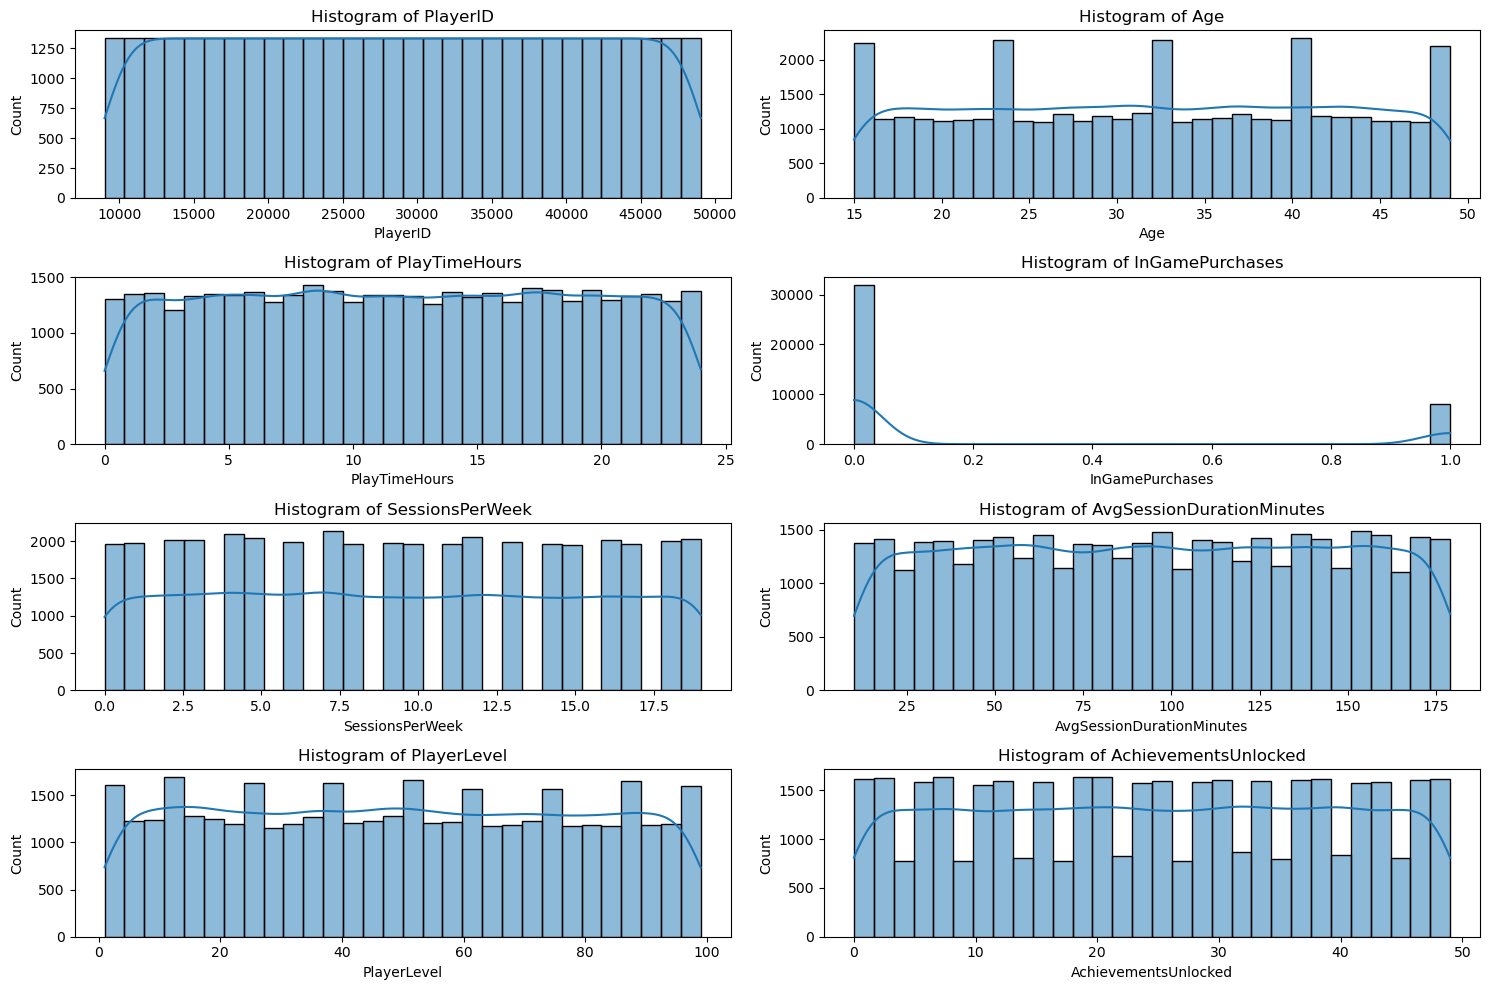

In [4]:
# Histograms
plt.figure(figsize=(15, 10))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[var], bins=30, kde=True)
    plt.title(f'Histogram of {var}')
plt.tight_layout()
plt.show()

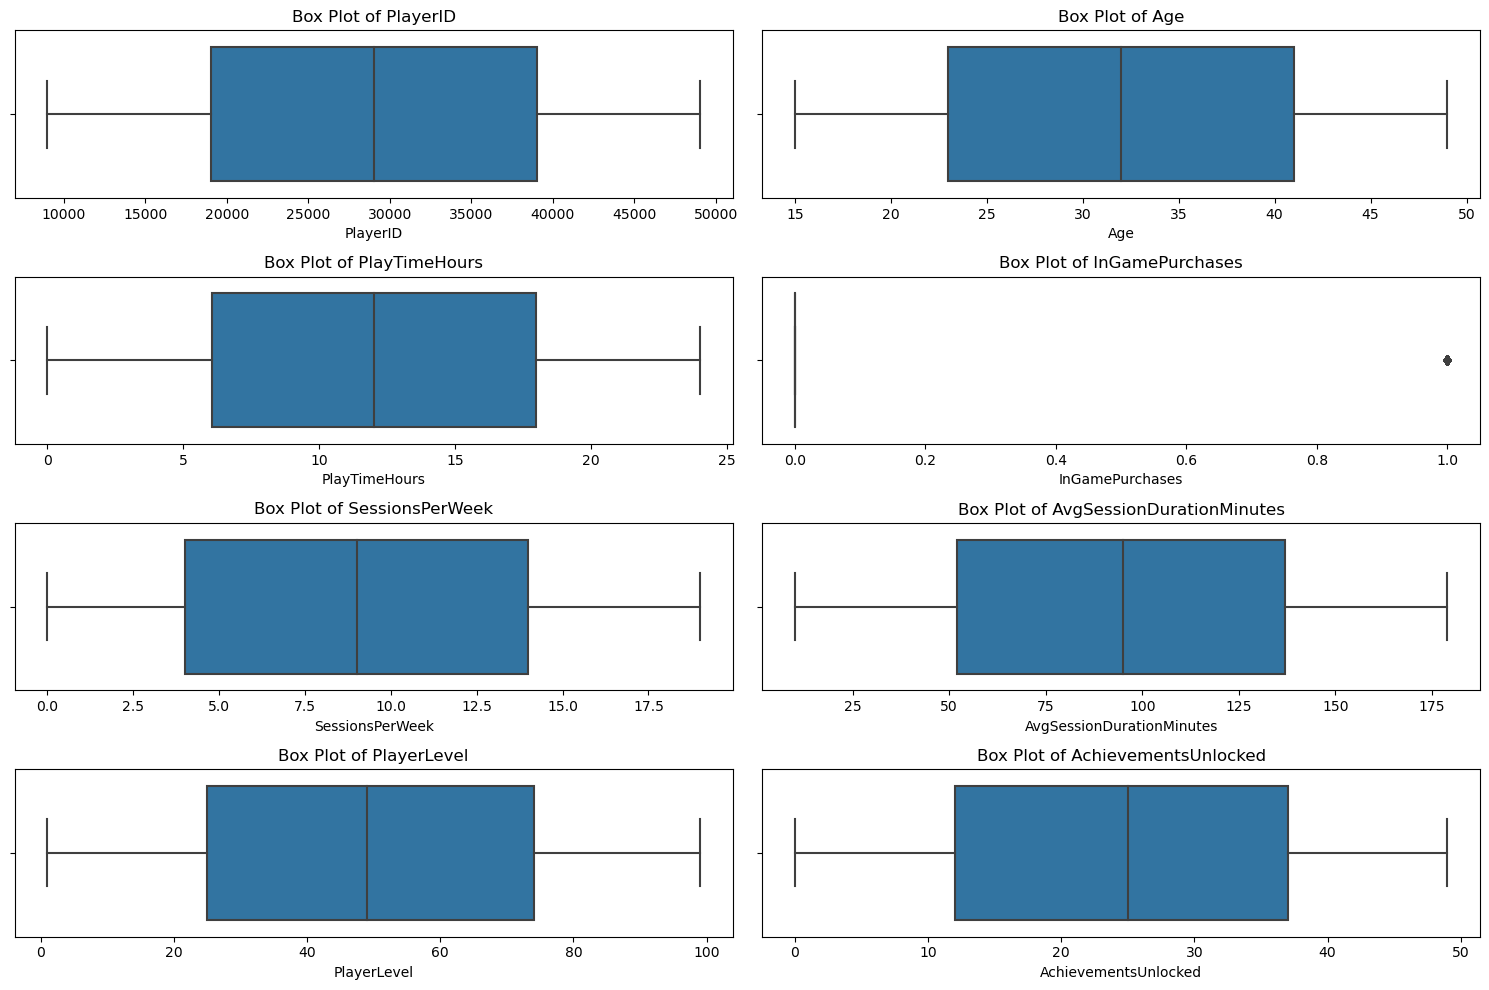

In [5]:
# Box Plots (Outlier Check)
plt.figure(figsize=(15, 10))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[var])
    plt.title(f'Box Plot of {var}')
plt.tight_layout()
plt.show()

In [6]:
# Handle Outliers (IQR Method)
for var in numeric_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)][var]
    print(f"{var} - Outliers: {len(outliers)} (Range: {lower_bound:.2f} to {upper_bound:.2f})")


PlayerID - Outliers: 0 (Range: -11016.50 to 69049.50)
Age - Outliers: 0 (Range: -4.00 to 68.00)
PlayTimeHours - Outliers: 0 (Range: -11.78 to 35.81)
InGamePurchases - Outliers: 8041 (Range: 0.00 to 0.00)
SessionsPerWeek - Outliers: 0 (Range: -11.00 to 29.00)
AvgSessionDurationMinutes - Outliers: 0 (Range: -75.50 to 264.50)
PlayerLevel - Outliers: 0 (Range: -48.50 to 147.50)
AchievementsUnlocked - Outliers: 0 (Range: -25.50 to 74.50)


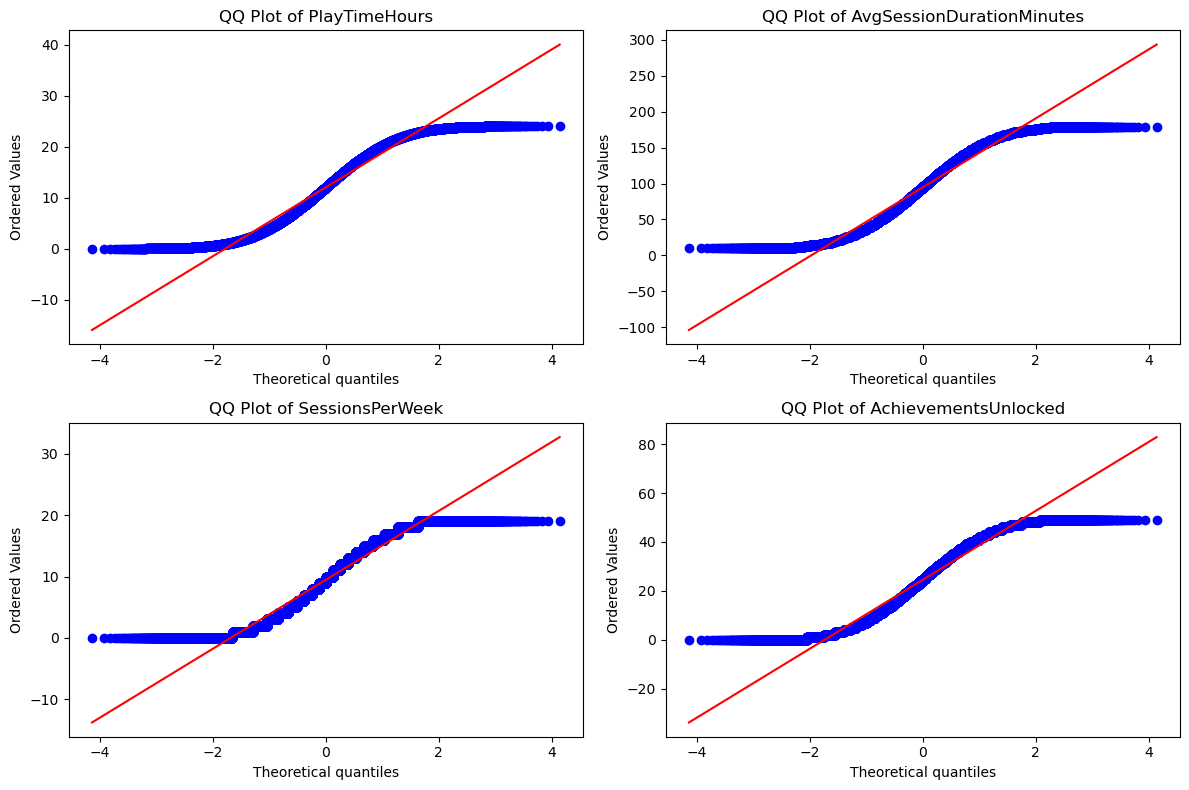


QQ Plots Explained: These compare your data to a normal distribution. If points follow the red line, it’s normal. Deviations suggest skewness/outliers.


In [7]:
# QQ Plots (Key Numerics)
key_numerics = ['PlayTimeHours', 'AvgSessionDurationMinutes', 'SessionsPerWeek', 'AchievementsUnlocked']
plt.figure(figsize=(12, 8))
for i, var in enumerate(key_numerics, 1):
    plt.subplot(2, 2, i)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {var}')
plt.tight_layout()
plt.show()

print("\nQQ Plots Explained: These compare your data to a normal distribution. If points follow the red line, it’s normal. Deviations suggest skewness/outliers.")

In [8]:
# Kolmogorov-Smirnov Tests (Normality Check)
for var in numeric_vars:
    stat, p = stats.kstest(df[var], 'norm', args=(df[var].mean(), df[var].std()))
    print(f"{var} - KS Stat: {stat:.4f}, p-value: {p:.4f}")
    if p > 0.05:
        print(f"  -> {var} looks normally distributed (p > 0.05)")
    else:
        print(f"  -> {var} is not normal (p <= 0.05)")

PlayerID - KS Stat: 0.0572, p-value: 0.0000
  -> PlayerID is not normal (p <= 0.05)
Age - KS Stat: 0.0716, p-value: 0.0000
  -> Age is not normal (p <= 0.05)
PlayTimeHours - KS Stat: 0.0577, p-value: 0.0000
  -> PlayTimeHours is not normal (p <= 0.05)
InGamePurchases - KS Stat: 0.4911, p-value: 0.0000
  -> InGamePurchases is not normal (p <= 0.05)
SessionsPerWeek - KS Stat: 0.0836, p-value: 0.0000
  -> SessionsPerWeek is not normal (p <= 0.05)
AvgSessionDurationMinutes - KS Stat: 0.0615, p-value: 0.0000
  -> AvgSessionDurationMinutes is not normal (p <= 0.05)
PlayerLevel - KS Stat: 0.0636, p-value: 0.0000
  -> PlayerLevel is not normal (p <= 0.05)
AchievementsUnlocked - KS Stat: 0.0673, p-value: 0.0000
  -> AchievementsUnlocked is not normal (p <= 0.05)


In [9]:
# Missing Value Check & Drop (Quantitative Only)
quant_vars = ['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 
              'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']
print("\nMissing Values in Quantitative Vars:")
for var in quant_vars:
    missing = df[var].isna().sum()
    print(f"{var}: {missing} missing")
df = df.dropna(subset=quant_vars)
print(f"Rows after drop: {len(df)}")


Missing Values in Quantitative Vars:
Age: 0 missing
PlayTimeHours: 0 missing
InGamePurchases: 0 missing
SessionsPerWeek: 0 missing
AvgSessionDurationMinutes: 0 missing
PlayerLevel: 0 missing
AchievementsUnlocked: 0 missing
Rows after drop: 40034


In [10]:
# 2. Calculate KPIs
# Retention Rate
retention_rate = (df['EngagementLevel'] != 'Low').mean() * 100
print(f"Retention Rate: {retention_rate:.2f}%")

Retention Rate: 74.21%


In [11]:
# Monetization Rate
monetization_rate = (df['InGamePurchases'] == 1).mean() * 100
print(f"Monetization Rate: {monetization_rate:.2f}%")

Monetization Rate: 20.09%


In [12]:
# Avg Session Duration
avg_session = df['AvgSessionDurationMinutes'].mean()
print(f"Avg Session Duration: {avg_session:.2f} minutes")

Avg Session Duration: 94.79 minutes


In [13]:
# Engagement Frequency
avg_sessions = df['SessionsPerWeek'].mean()
print(f"Avg Sessions per Week: {avg_sessions:.2f}")

Avg Sessions per Week: 9.47


In [14]:
# Progression Rate
df['progression_rate'] = df['AchievementsUnlocked'] / df['PlayerLevel'].replace(0, 1)
progression_avg = df['progression_rate'].mean()
print(f"Avg Progression Rate: {progression_avg:.2f} achievements/level")

Avg Progression Rate: 1.28 achievements/level


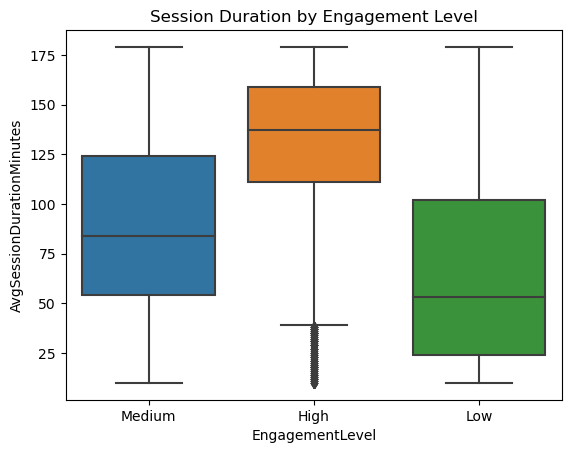

In [15]:
# 3. Explore Patterns
# Engagement vs. Session Duration
sns.boxplot(x='EngagementLevel', y='AvgSessionDurationMinutes', data=df)
plt.title('Session Duration by Engagement Level')
plt.show()

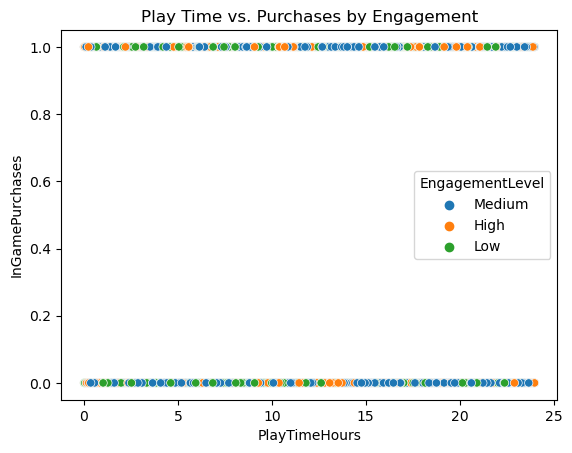

In [16]:
# Purchases vs. Play Time
sns.scatterplot(x='PlayTimeHours', y='InGamePurchases', hue='EngagementLevel', data=df)
plt.title('Play Time vs. Purchases by Engagement')
plt.show()

In [17]:
# 4. Predict Engagement
# Encode categorical
le = LabelEncoder()
df['EngagementLevel'] = le.fit_transform(df['EngagementLevel'])  # High=2, Medium=1, Low=0
df['Gender'] = le.fit_transform(df['Gender'])  # Male/Female to 0/1
df['GameDifficulty'] = le.fit_transform(df['GameDifficulty'])  # Easy/Med/Hard to 0/1/2

In [18]:
# Features 
X = df[['Age', 'Gender', 'PlayTimeHours', 'InGamePurchases', 'GameDifficulty', 
        'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']]
y = df['EngagementLevel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"Engagement Prediction Accuracy: {accuracy:.2f}")

Engagement Prediction Accuracy: 0.91


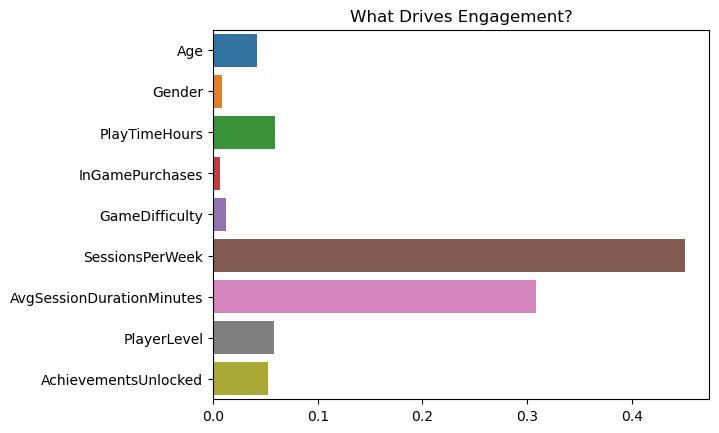

In [20]:
# Feature Importance
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title('What Drives Engagement?')
plt.show()

In [21]:
# 5. Insight Checks
# Sessions by Engagement
print("\nSessions per Week by Engagement:")
print(df.groupby('EngagementLevel')['SessionsPerWeek'].mean())


Sessions per Week by Engagement:
EngagementLevel
0    14.254547
1     4.530511
2     9.553267
Name: SessionsPerWeek, dtype: float64


In [22]:
print(df['EngagementLevel'].value_counts())

2    19374
0    10336
1    10324
Name: EngagementLevel, dtype: int64


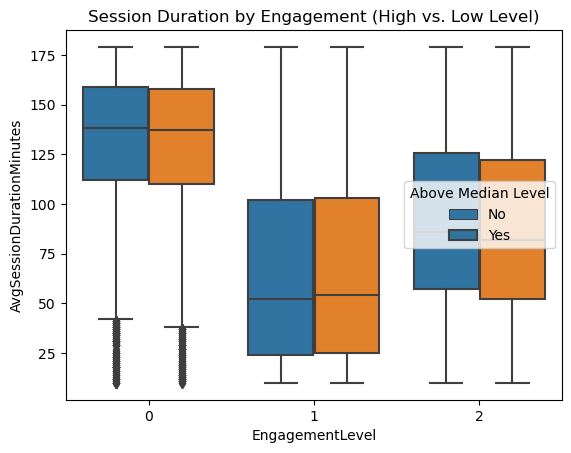

In [23]:
# Session Duration by Engagement & Level
df['AboveMedianLevel'] = df['PlayerLevel'] > df['PlayerLevel'].median()  # Boolean column
sns.boxplot(x='EngagementLevel', y='AvgSessionDurationMinutes', hue='AboveMedianLevel', data=df)
plt.title('Session Duration by Engagement (High vs. Low Level)')
plt.legend(title='Above Median Level', labels=['No', 'Yes'])
plt.show()

In [24]:
# Purchases vs. Sessions
print("\nSessions per Week by Purchases:")
print(df.groupby('InGamePurchases')['SessionsPerWeek'].mean())


Sessions per Week by Purchases:
InGamePurchases
0    9.456944
1    9.530780
Name: SessionsPerWeek, dtype: float64



Low Engagement Sessions - Median: 3.0
Low Engagement Sessions - 75th Percentile: 7.0


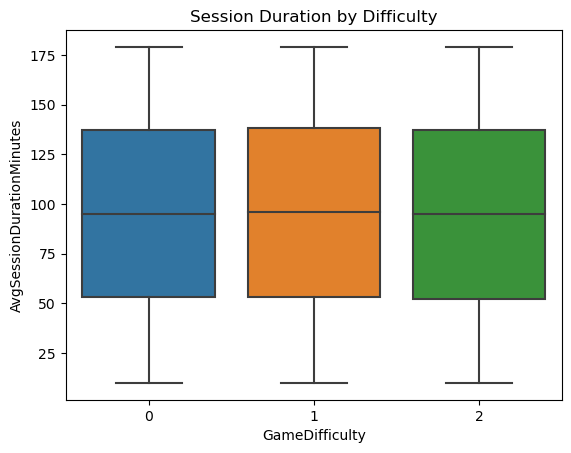

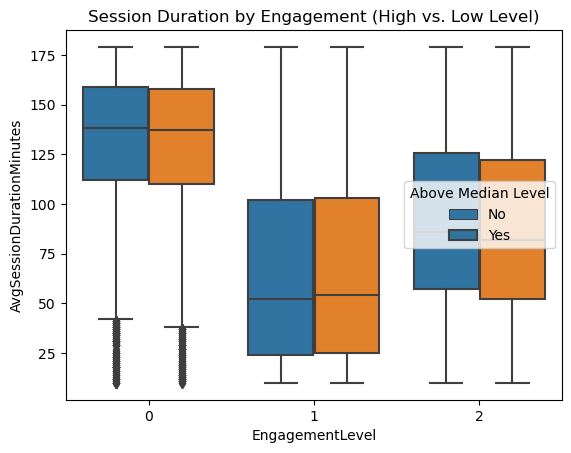

In [25]:
# Validate Low Engagement Sessions
low_sessions = df[df['EngagementLevel'] == 1]['SessionsPerWeek']
print("\nLow Engagement Sessions - Median:", low_sessions.median())
print("Low Engagement Sessions - 75th Percentile:", low_sessions.quantile(0.75))

sns.boxplot(x='GameDifficulty', y='AvgSessionDurationMinutes', data=df)
plt.title('Session Duration by Difficulty')
plt.show()

df['AboveMedianLevel'] = df['PlayerLevel'] > df['PlayerLevel'].median()
sns.boxplot(x='EngagementLevel', y='AvgSessionDurationMinutes', hue='AboveMedianLevel', data=df)
plt.title('Session Duration by Engagement (High vs. Low Level)')
plt.legend(title='Above Median Level', labels=['No', 'Yes'])
plt.show()

In [26]:
# Save
df.to_csv('semih_gaming_analytics.csv', index=False)
print("Saved for your portfolio!")

Saved for your portfolio!
